In [1]:
print('Hello World')

Hello World


# 파이썬으로 엑셀을 만져보자
## openpyxl

# 엑셀 파일 생성하기
엑셀 파일을 생성하고 저장하기 
파일하나의 단위를 workbook이라고 함 -> wb

In [22]:
from openpyxl import Workbook

wb = Workbook() # 새 워크북 생성
ws = wb.active # 현재 활성화된 sheet 가져옴
ws.title = "Edwards" # sheet 의 이름을 변경
wb.save("edwards.xlsx")

# Sheet 다루기
여러 시트를 생성하고 시트의 이름및 색상등을 변경하기
- create_sheet()
- sheet_properties.tabColor
- title
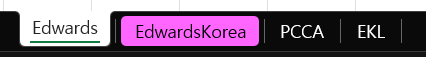

In [2]:
wb.active
ws = wb.create_sheet() # 새로운 Sheet 기본 이름으로 생성
ws.title = "EdwardsKorea" # Sheet 이름 변경
ws.sheet_properties.tabColor = "ff66ff" # RGB 형태로 값을 넣어주면 탭 색상 변경

# Sheet, MySheet, YourSheet
ws1 = wb.create_sheet("EKL") # 주어진 이름으로 Sheet 생성
ws2 = wb.create_sheet("PCCA", 2) # 2번째 index 에 Sheet 생성

new_ws = wb["EKL"] # Dict 형태로 Sheet 에 접근
wb.save("edwards.xlsx")

# Cell 다루기
### 셀에 값을 채워 넣기
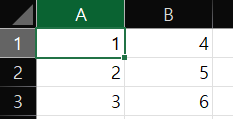

In [6]:
ws = wb.active
ws.title = "EdwardsSheet"

# A1 셀에 1 이라는 값을 입력
ws["A1"] = 1
ws["A2"] = 2
ws["A3"] = 3

ws["B1"] = 4
ws["B2"] = 5
ws["B3"] = 6

ws["C1"] = 4
ws["C2"] = 5
ws["C3"] = 6
wb.save("edwards.xlsx")

### Sheet 복사하기

In [5]:
target = wb.copy_worksheet(ws)
target.title = "Copied Sheet"
wb.save("edwards.xlsx")

### 셀의 값을 확인하는 방법
1. Cell Valve보기 A1,B1,C2

In [7]:
print(ws["A1"].value)
print(ws["B1"].value)
print(ws["C2"].value)

1
4
5


2. column과 row로 확인 하기

In [ ]:
print(ws.cell(column=1, row=1).value) # ws["A1"].value
print(ws.cell(column=2, row=1).value) # ws["B1"].value

### C1 셀에 값을 10으로 채우기
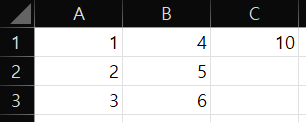

In [ ]:
c = ws.cell(column=3, row=1, value=10) 
wb.save("edwards.xlsx")

### 랜덤값으로 10x10에 값을 채워넣기
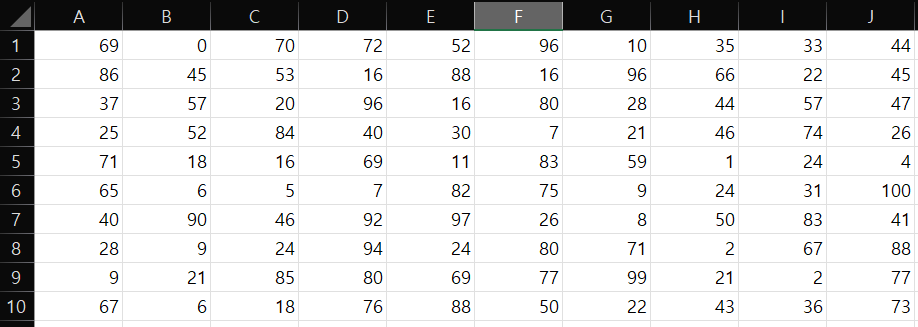

In [9]:
from random import *

index = 1
for x in range(1, 11): # 10 개 row
    for y in range(1, 11): # 10 개 column
        ws.cell(row=x, column=y, value=randint(0, 100)) # 0~100 사이의 숫자
wb.save("edwards.xlsx")

### 10x10셀에 1~100으로 으로 채우기
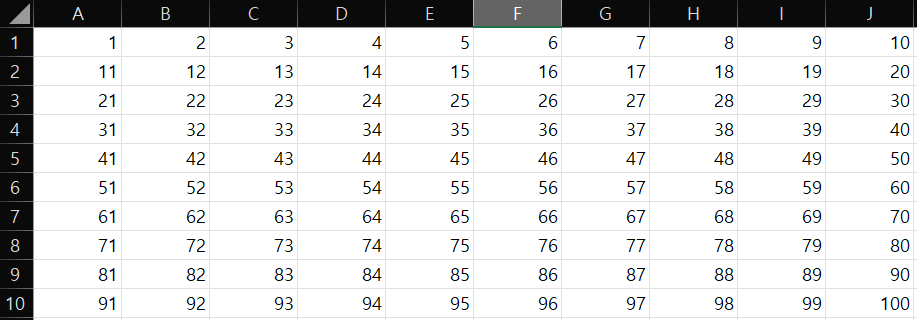

In [ ]:
index = 1
for x in range(1, 11): # 10 개 row
    for y in range(1, 11): # 10 개 column
        ws.cell(row=x, column=y, value=index)
        index += 1
wb.save("edwards.xlsx")
wb.close()

### 파일 열기

- load_workbook

# 셀의 범위 지정하기

1번부터 10번까지 영어 수학 점수를 임의의 점수로 생성

In [29]:

wb = Workbook()
ws = wb.active

ws.append(["번호", "영어", "수학"])
for i in range(1, 11): 
    ws.append([i, randint(0, 100), randint(0, 100)])
    print("{0} {1} {2}".format(ws.cell(row=i, column=1).value,ws.cell(row=i, column=2).value,ws.cell(row=i, column=3).value), end="\n")
wb.save("score.xlsx")
wb.close()



번호 영어 수학
1 99 72
2 81 21
3 51 86
4 2 10
5 58 63
6 47 88
7 33 31
8 70 57
9 50 52


### File에서 불러오기

In [13]:
from openpyxl import load_workbook 

wb = load_workbook("score.xlsx") 
ws = wb.active 

# worksheet내용 출력 
for x in range(1, ws.max_row + 1):
    for y in range(1, ws.max_column + 1):
        print(ws.cell(row=x, column=y).value, end=" ") # 1 2 3 4 ..
    print()

번호 영어 수학 
1 0 99 
2 87 69 
3 74 1 
4 37 97 
5 58 33 
6 9 23 
7 5 45 
8 37 11 
9 69 50 
10 75 30 


Pandas를 이용해 더 쉽게 불러오기! 

In [30]:
import pandas as pd
df = df = pd.read_excel("score.xlsx", engine = "openpyxl")
df

,번호,영어,수학
0,1,99,72
1,2,81,21
2,3,51,86
3,4,2,10
4,5,58,63
5,6,47,88
6,7,33,31
7,8,70,57
8,9,50,52
9,10,13,93


In [15]:
eng_high = df['수학'] > 90 # 영어 성적 90 이상인 애들만. 
df[eng_high]

,번호,영어,수학
0,1,0,99
3,4,37,97


In [ ]:
df[eng_high].to_excel('high_eng_score.xlsx',sheet_name='high_eng')

# 셀 추가 삭제
1. 열 추가하기

In [ ]:
from openpyxl import load_workbook
wb = load_workbook(filename="score.xlsx")
ws = wb.active
ws.insert_rows(8) # 8번째 줄이 비워짐
ws.insert_rows(8, 5) # 8번째 줄 위치에 5줄을 추가
wb.save("score_insert_rows.xlsx")

2. Column 추가하기

In [ ]:
ws.insert_cols(2, 3) # B번째 열로부터 3열 추가
wb.save("score_insert_cols.xlsx")

3. 열 삭제하기

In [ ]:
wb = load_workbook("score.xlsx")
ws = wb.active

# ws.delete_rows(8) # 8 번째 줄에 있는 7 번 학생 데이터 삭제
ws.delete_rows(8, 3) # 8번째 줄부터 총 3줄 삭제
wb.save("score_delete_row.xlsx")

4. Column 삭제하기

In [ ]:
wb = wb.load_workbook("score.xlsx")
ws = wb.active

# ws.delete_cols(2) # 2번째 열 (B) 삭제
ws.delete_cols(2, 2) # 2번재 열로부터 총 2개 열 삭제

wb.save("score_delete_col.xlsx")

5. 이동하기

In [ ]:
wb = load_workbook("score.xlsx")
ws = wb.active

# 번호 영어 수학
# 번호 (국어) 영어 수학
ws.move_range("B1:C11", rows=0, cols=1)
ws["B1"].value = "국어" # B1 셀에 '국어' 입력

wb.save("score_korean.xlsx")

### 셀에 이미지 넣기

In [ ]:
from openpyxl import Workbook
from openpyxl.drawing.image import Image
wb = Workbook()
ws = wb.active

img = Image("img.jpg")

# C3 위치에 img.png 파일의 이미지를 삽입
ws.add_image(img, "C3")

wb.save("install image.xlsx")

# ImportError : You must install Pillow to fetch image....

